In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('SaleData UL Lab.xlsx')
data.head(5)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [48]:

grouped = data.groupby('Item')

most_dissimilar_pairs = {}

for item, group in grouped:
    group_data = group.drop(columns=['Item'])
    numeric_cols = group_data.select_dtypes(include=np.number)
    nominal_cols = group_data.select_dtypes(exclude=np.number)
    
    scaler = MinMaxScaler()
    normalized_numeric = scaler.fit_transform(numeric_cols)
    
    if not nominal_cols.empty:
        nominal_dissimilarities = np.zeros((len(group_data), len(group_data)))
        for col in nominal_cols.columns:
            col_values = nominal_cols[col].values
            column_dissimilarity = (col_values[:, None] != col_values).astype(int)
            nominal_dissimilarities += column_dissimilarity
        nominal_dissimilarities /= nominal_cols.shape[1]
    else:
        nominal_dissimilarities = np.zeros((len(group_data), len(group_data)))
    
    numeric_dissimilarities = np.abs(normalized_numeric[:, None, :] - normalized_numeric[None, :, :]).mean(axis=2)
    combined_dissimilarities = (numeric_dissimilarities + nominal_dissimilarities) / 2
    
    np.fill_diagonal(combined_dissimilarities, 0)
    max_distance = np.max(combined_dissimilarities)
    indices = np.where(combined_dissimilarities == max_distance)
    point_1, point_2 = indices[0][0], indices[1][0]
    
    most_dissimilar_pairs[item] = {
        'Pair_Indices': (point_1, point_2),
        'Dissimilarity': max_distance
    }


Item: Cell Phone
Most Dissimilar Pair Indices: (0, 3)
Dissimilarity: 0.7839506172839505

Item: Desk
Most Dissimilar Pair Indices: (1, 2)
Dissimilarity: 0.7222222222222222

Item: Home Theater
Most Dissimilar Pair Indices: (8, 13)
Dissimilarity: 0.8333333333333333

Item: Television
Most Dissimilar Pair Indices: (0, 11)
Dissimilarity: 0.8333333333333333

Item: Video Games
Most Dissimilar Pair Indices: (0, 1)
Dissimilarity: 0.8333333333333333



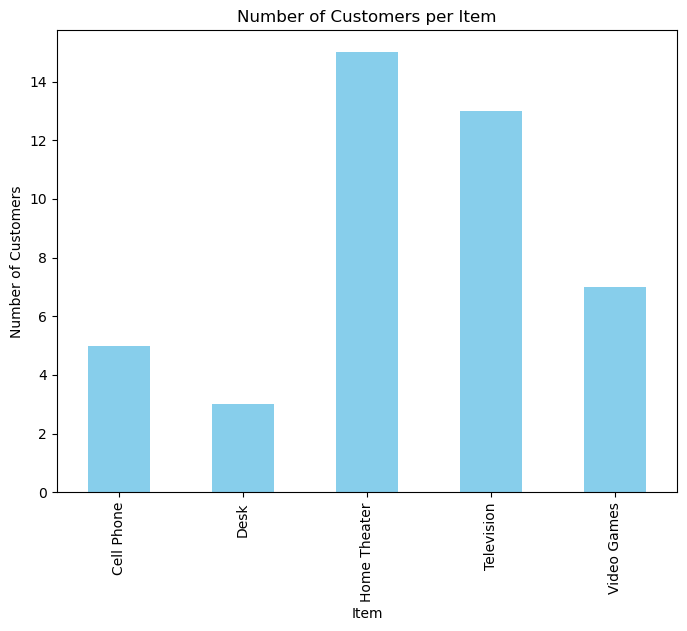

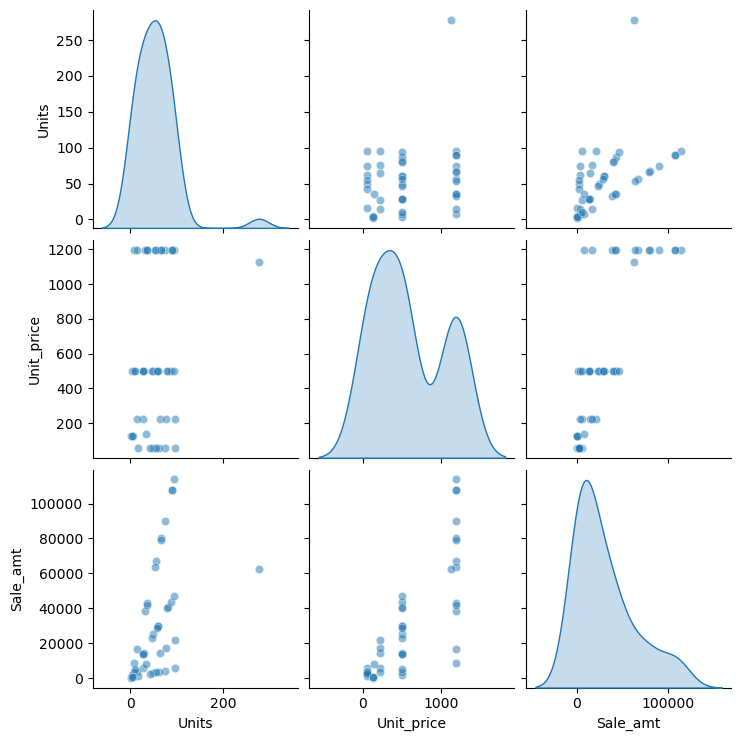

In [49]:
for item, result in most_dissimilar_pairs.items():
    print(f"Item: {item}")
    print(f"Most Dissimilar Pair Indices: {result['Pair_Indices']}")
    print(f"Dissimilarity: {result['Dissimilarity']}")
    print()

group_counts = grouped.size()
group_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Number of Customers per Item')
plt.xlabel('Item')
plt.ylabel('Number of Customers')
plt.show()

numeric_cols = data.select_dtypes(include=np.number)
sns.pairplot(numeric_cols, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()